# Naive Bayes

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from tabulate import tabulate

sys.path.append('../src') # permite importar modulos locales

In [2]:
from arff_helper import DataSet
from metrics import accuracy_score, recall_score 
from classifier import NBClassifier
from k_fold_cross_validation import k_fold_cross_validation

# Ejemplo Clase

In [3]:
ds = DataSet()
ds.load_from_arff('../datasets/dataset_clase.arff')
target_attribute='Juega'
classifier = NBClassifier(target_attribute, ds.attribute_info, ds.attribute_list)
classifier.fit (ds.pandas_df)

errors = 0
for i in range (ds.pandas_df.shape[0]):
    instance = ds.pandas_df.loc[i]
    predict_result = classifier.predict(instance)
    print(f'Real value : {instance[target_attribute]}, Predicted: {predict_result}')
    if instance[target_attribute] != predict_result:
        errors = errors + 1
print(f'Cantidad de errores: {errors}')        


Real value : NO, Predicted: NO
Real value : NO, Predicted: NO
Real value : YES, Predicted: YES
Real value : YES, Predicted: YES
Real value : YES, Predicted: YES
Real value : NO, Predicted: YES
Real value : YES, Predicted: YES
Real value : NO, Predicted: NO
Real value : YES, Predicted: YES
Real value : YES, Predicted: YES
Real value : YES, Predicted: YES
Real value : YES, Predicted: YES
Real value : YES, Predicted: YES
Real value : NO, Predicted: NO
Cantidad de errores: 1


## Evaluación del algoritmo

1. Separe 4/5 del conjunto de entrenamiento y realice una validación cruzada de tamaño 10.

2. Con el 1/5 no utilizado en la parte previa evalúe al resultado de entrenar con los 4/5 restantes.

Metricas:

    Acuracy: Se calcula la proporcion de predicciones correctas.
    Recall: Se calcula que proporción de positivos reales se identificaron correctamente.



Metric      #    T=1/5 S=4/5    Avg kfold
--------  ---  -------------  -----------
Accuracy    1       0.964602     0.931111
Accuracy    2       0.920354     0.937778
Accuracy    3       0.902655     0.948889
Accuracy    4       0.938053     0.937778
Accuracy    5       0.955752     0.933333
Recall      1       0.925926     0.912564
Recall      2       0.965517     0.913881
Recall      3       0.864865     0.930239
Recall      4       0.925926     0.891558
Recall      5       0.966667     0.907108


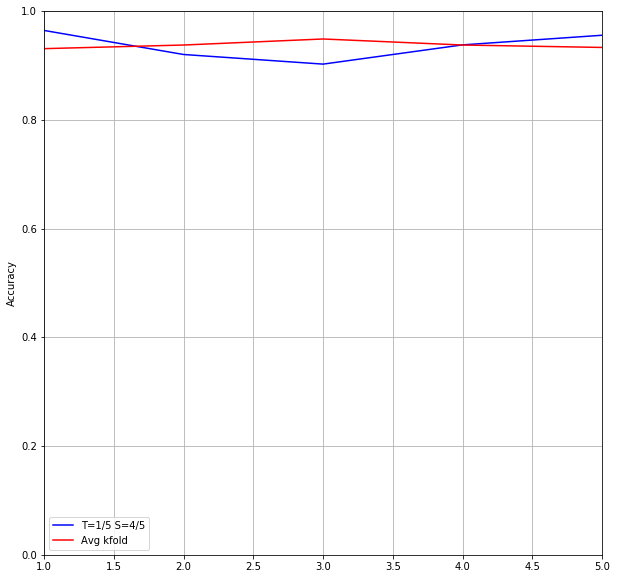

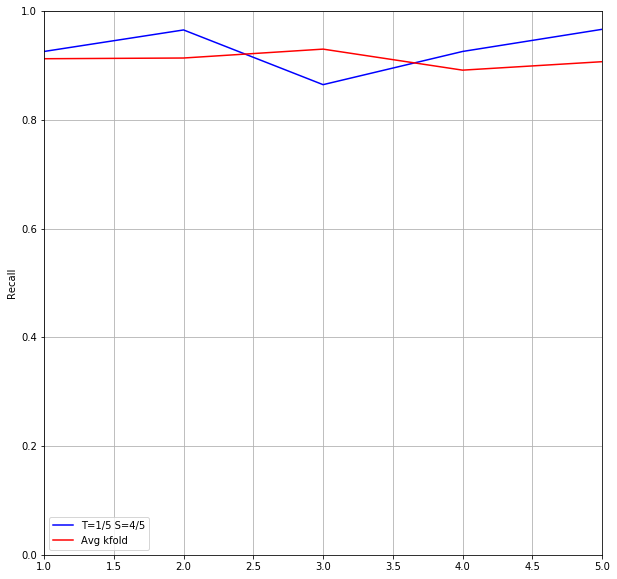

In [5]:
ds = DataSet()
ds.load_from_arff('../datasets/Autism-Adult-Training-Subset.arff')    
target_attribute = 'Class/ASD'

n = 5
k_for_k_fold = 10
metrics = [accuracy_score, recall_score]
metrics_result_kfold = [[] for x in range(len(metrics))]
metrics_result = [[] for x in range(len(metrics))]
for i in range(n):

    # Separo el dataset original en 4/5 y 1/5
    train_pandas_df = ds.pandas_df.sample (frac=0.8)
    test_pandas_df = ds.pandas_df.loc[~ds.pandas_df.index.isin (train_pandas_df.index), :]

    ds_train = DataSet ()
    ds_train.load_from_pandas_df (train_pandas_df, ds.attribute_info, ds.attribute_list)

    # Instancio clasificador nb para realizar la validacion
    classifier = NBClassifier (target_attribute, ds.attribute_info, ds.attribute_list)

    # Con los 4/5 se realiza una validación cruzada de tamaño 10, usando distintas metricas
    result = k_fold_cross_validation(ds_train, target_attribute, k_for_k_fold, classifier, metrics)
    for index in range (len (metrics)):
        metrics_result_kfold[index].append(result[index])

    #Entreno con los 4/5 y valido con el 1/5 restante
    classifier.fit(train_pandas_df)
    y_predicted = test_pandas_df.apply(lambda row: classifier.predict (row), axis=1)
    y_true = test_pandas_df[target_attribute]

    for index in range(len(metrics)):
        metrics_result[index].append(metrics[index](y_predicted, y_true))

#Presentacion de resultados
x = [i+1 for i in range(n)]

table = [["Accuracy", x[i], metrics_result[0][i], metrics_result_kfold[0][i]] for i in range (n)]
for i in range (n):
    table.append (["Recall", x[i], metrics_result[1][i], metrics_result_kfold[1][i]])
print (tabulate (table, headers=["Metric", "#", "T=1/5 S=4/5", "Avg kfold"]))


#Metrica accurancy
plt.figure (figsize=(10, 10))
plt.ylabel ('Accuracy')
plt.axis ([1, n, 0, 1])
plt.grid (True)
plt.plot (x, metrics_result[0], color='b', label='T=1/5 S=4/5')
plt.plot (x, metrics_result_kfold[0], color='r', label='Avg kfold')
plt.legend (loc=0)
plt.show ()

#Metrica recall
plt.figure (figsize=(10, 10))
plt.ylabel ('Recall')
plt.axis ([1, n, 0, 1])
plt.grid (True)
plt.plot (x, metrics_result[1], color='b', label='T=1/5 S=4/5')
plt.plot (x, metrics_result_kfold[1], color='r', label='Avg kfold')
plt.legend (loc=0)
plt.show ()